In [11]:
import pandas as pd    #read files and manipulate dataframes
import numpy as np   #used in creation of n-dimensional arrays and for computaion
import yfinance as yf  #Yahoo Finance package to read relevant data related to stock
import seaborn as sns  #for plotting and visualization
from sklearn.preprocessing import StandardScaler  #to standardize the data before clustering
from sklearn.cluster import KMeans  # to perform K-Means
import matplotlib.pyplot as plt  #for plotting and visualization
from sklearn.metrics import silhouette_score  #Silhouette Score used to find optimum 'k' for K-means
import scipy.cluster.hierarchy as sch  #used for agglomerative clustering and clreating dendrograms

In [12]:
df_ticker = pd.read_csv("C:/Users/Diya/OneDrive/Documents/ind_nifty200list.csv")

In [13]:
symbol_list = df_ticker['Symbol'].unique().tolist()
symbol_list

['ABB',
 'ACC',
 'APLAPOLLO',
 'AUBANK',
 'ADANIENSOL',
 'ADANIENT',
 'ADANIGREEN',
 'ADANIPORTS',
 'ADANIPOWER',
 'ATGL',
 'ABCAPITAL',
 'ABFRL',
 'ALKEM',
 'AMBUJACEM',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASHOKLEY',
 'ASIANPAINT',
 'ASTRAL',
 'AUROPHARMA',
 'DMART',
 'AXISBANK',
 'BSE',
 'BAJAJ-AUTO',
 'BAJFINANCE',
 'BAJAJFINSV',
 'BAJAJHLDNG',
 'BALKRISIND',
 'BANDHANBNK',
 'BANKBARODA',
 'BANKINDIA',
 'MAHABANK',
 'BERGEPAINT',
 'BDL',
 'BEL',
 'BHARATFORG',
 'BHEL',
 'BPCL',
 'BHARTIARTL',
 'BIOCON',
 'BOSCHLTD',
 'BRITANNIA',
 'CGPOWER',
 'CANBK',
 'CHOLAFIN',
 'CIPLA',
 'COALINDIA',
 'COFORGE',
 'COLPAL',
 'CONCOR',
 'CUMMINSIND',
 'DLF',
 'DABUR',
 'DALBHARAT',
 'DEEPAKNTR',
 'DELHIVERY',
 'DIVISLAB',
 'DIXON',
 'LALPATHLAB',
 'DRREDDY',
 'EICHERMOT',
 'ESCORTS',
 'NYKAA',
 'FEDERALBNK',
 'FACT',
 'FORTIS',
 'GAIL',
 'GMRINFRA',
 'GLAND',
 'GODREJCP',
 'GODREJPROP',
 'GRASIM',
 'GUJGASLTD',
 'HCLTECH',
 'HDFCAMC',
 'HDFCBANK',
 'HDFCLIFE',
 'HAVELLS',
 'HEROMOTOCO',
 'HINDALCO',
 

In [14]:
df_ticker

,Company Name,Industry,Symbol,Series,ISIN Code
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025
2,APL Apollo Tubes Ltd.,Capital Goods,APLAPOLLO,EQ,INE702C01027
3,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017
4,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010
...,...,...,...,...,...
196,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022
197,Yes Bank Ltd.,Financial Services,YESBANK,EQ,INE528G01035
198,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028
199,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015


In [15]:
ticker = yf.Ticker("WIPRO"+".NS")
ticker.info['beta']

0.745

In [16]:
beta_values = []

for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'beta' in ticker.info:
        beta_value = ticker.info['beta']
        beta_values.append(beta_value)
    else:
        beta_values.append(None) 

df_ticker['beta_value'] = beta_values
df_ticker

,Company Name,Industry,Symbol,Series,ISIN Code,beta_value
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022,0.721
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025,0.401
2,APL Apollo Tubes Ltd.,Capital Goods,APLAPOLLO,EQ,INE702C01027,0.794
3,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017,0.841
4,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010,1.170
...,...,...,...,...,...,...
196,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022,0.745
197,Yes Bank Ltd.,Financial Services,YESBANK,EQ,INE528G01035,0.633
198,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028,0.735
199,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015,0.254


In [19]:
revenue = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'revenueGrowth' in ticker.info:
        rev = ticker.info['revenueGrowth']
        revenue.append(rev)
    else:
        revenue.append(None)  

df_ticker['revenue_growth'] = revenue

In [20]:
earning = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'earningsGrowth' in ticker.info:
        earn = ticker.info['earningsGrowth']
        earning.append(earn)
    else:
        earning.append(None)  

df_ticker['earning_growth'] = earning

In [21]:
ret_eq = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'returnOnEquity' in ticker.info:
        ret = ticker.info['returnOnEquity']
        ret_eq.append(ret)
    else:
        ret_eq.append(None) 

df_ticker['return_on_equity'] = ret_eq

In [22]:
trailing = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'trailingPE' in ticker.info:
        ret = ticker.info['trailingPE']
        trailing.append(ret)
    else:
        trailing.append(None) 

df_ticker['tariling_priceeq'] = trailing

In [23]:
df_ticker.rename(columns = {'tariling_priceeq':'trailing_priceeq'}, inplace=True)

In [24]:
forward = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'forwardPE' in ticker.info:
        ret = ticker.info['forwardPE']
        forward.append(ret)
    else:
        forward.append(None) 

df_ticker['forward_priceeq'] = forward

In [25]:
ebitda = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'ebitda' in ticker.info:
        eb = ticker.info['ebitda']
        ebitda.append(eb)
    else:
        ebitda.append(None) 

df_ticker['EBITDA'] = ebitda

In [27]:
returnOnAssets = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'returnOnAssets' in ticker.info:
        roa = ticker.info['returnOnAssets']
        returnOnAssets.append(roa)
    else:
        returnOnAssets.append(None) 

df_ticker['returnOnAssets'] = returnOnAssets

In [28]:
dte = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'debtToEquity' in ticker.info:
        eq = ticker.info['debtToEquity']
        dte.append(eq)
    else:
        dte.append(None) 

df_ticker['debtToEquity'] = dte

In [29]:
rat = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'currentRatio' in ticker.info:
        cr = ticker.info['currentRatio']
        rat.append(cr)
    else:
        rat.append(None) 

df_ticker['currentRatio'] = rat

In [30]:
ptb = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'priceToBook' in ticker.info:
        roa = ticker.info['priceToBook']
        ptb.append(roa)
    else:
        ptb.append(None) 

df_ticker['priceToBook'] = ptb

In [31]:
ocf = []
for i in symbol_list:
    ticker = yf.Ticker(i + ".NS")
    if 'operatingCashflow' in ticker.info:
        roa = ticker.info['operatingCashflow']
        ocf.append(roa)
    else:
        ocf.append(None) 

df_ticker['operatingCashflow'] = ocf

In [32]:
df_ticker

,Company Name,Industry,Symbol,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow
0,ABB India Ltd.,Capital Goods,ABB,EQ,INE117A01022,0.721,0.278,0.875,NaN,139.589750,84.471240,1.785817e+10,NaN,0.824,NaN,29.413034,NaN
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.721998,19.716940,2.904540e+10,0.06174,2.173,1.595,3.099992,2.995110e+10
2,APL Apollo Tubes Ltd.,Capital Goods,APLAPOLLO,EQ,INE702C01027,0.794,0.076,-0.156,0.22161,58.833015,NaN,1.192170e+10,0.09743,31.744,1.339,11.938407,1.111560e+10
3,AU Small Finance Bank Ltd.,Financial Services,AUBANK,EQ,INE949L01017,0.841,0.169,-0.129,0.13041,28.045950,30.214521,NaN,0.01537,NaN,NaN,3.414407,-1.520906e+11
4,Adani Energy Solutions Ltd.,Power,ADANIENSOL,EQ,INE931S01010,1.170,0.402,-0.022,0.08997,98.858536,NaN,6.102000e+10,0.04884,270.520,1.011,8.941381,6.037620e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Wipro Ltd.,Information Technology,WIPRO,EQ,INE075A01022,0.745,-0.042,-0.034,0.14497,26.857006,21.803661,1.620290e+11,0.07441,21.917,2.577,3.895517,1.762160e+11
197,Yes Bank Ltd.,Financial Services,YESBANK,EQ,INE528G01035,0.633,0.271,1.296,0.03102,59.954544,19.984846,NaN,0.00338,NaN,NaN,1.827629,-3.920279e+11
198,Zee Entertainment Enterprises Ltd.,Media Entertainment & Publication,ZEEL,EQ,INE256A01028,0.735,0.027,NaN,0.01845,77.362320,14.966355,7.217000e+09,0.02750,2.118,4.995,1.512495,NaN
199,Zomato Ltd.,Consumer Services,ZOMATO,EQ,INE758T01015,0.254,0.732,NaN,0.01761,572.875000,83.327270,4.200000e+08,-0.01346,3.670,2.620,9.822538,6.460000e+09


In [33]:
df_ticker.dropna()

,Company Name,Industry,Symbol,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow
1,ACC Ltd.,Construction Materials,ACC,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.721998,19.716940,2.904540e+10,0.06174,2.173,1.595,3.099992,2.995110e+10
7,Adani Ports and Special Economic Zone Ltd.,Services,ADANIPORTS,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.668182,44.735190,1.566404e+11,0.06434,90.394,1.061,6.119029,1.501758e+11
8,Adani Power Ltd.,Power,ADANIPOWER,EQ,INE814H01011,0.677,0.305,-0.548,0.57049,13.728929,-317.735400,1.821608e+11,0.10050,80.231,1.621,7.680092,1.417015e+11
12,Alkem Laboratories Ltd.,Healthcare,ALKEM,EQ,INE540L01014,0.404,0.011,3.133,0.17980,35.834000,26.175129,2.245490e+10,0.08294,13.238,2.606,6.242818,1.948070e+10
14,Apollo Hospitals Enterprise Ltd.,Healthcare,APOLLOHOSP,EQ,INE437A01024,0.554,0.149,0.756,0.13500,103.376430,78.887870,2.390700e+10,0.06830,72.845,1.132,13.346762,1.920200e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Tube Investments of India Ltd.,Automobile and Auto Components,TIINDIA,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,88.467800,67.874374,1.926240e+10,0.08128,31.194,1.601,15.470280,6.751500e+09
189,UltraTech Cement Ltd.,Construction Materials,ULTRACEMCO,EQ,INE481G01011,0.551,0.094,0.356,0.12217,48.800570,86.351800,1.296856e+11,0.06389,18.916,0.861,5.662812,1.089754e+11
193,Vedanta Ltd.,Metals & Mining,VEDL,EQ,INE205A01025,1.411,-0.063,-0.271,0.16479,40.551636,9.891281,3.562700e+11,0.08093,172.980,0.660,5.547372,3.565400e+11
195,Voltas Ltd.,Consumer Durables,VOLTAS,EQ,INE226A01021,0.342,0.421,-0.191,0.04373,201.440780,49.481250,4.874000e+09,0.02545,12.702,1.342,8.703178,7.615100e+09


In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sn

In [35]:
data = df_ticker.dropna()
data = data.set_index('Symbol')
data

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow
Symbol,,,,,,,,,,,,,,,,
ACC,ACC Ltd.,Construction Materials,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.721998,19.716940,2.904540e+10,0.06174,2.173,1.595,3.099992,2.995110e+10
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.668182,44.735190,1.566404e+11,0.06434,90.394,1.061,6.119029,1.501758e+11
ADANIPOWER,Adani Power Ltd.,Power,EQ,INE814H01011,0.677,0.305,-0.548,0.57049,13.728929,-317.735400,1.821608e+11,0.10050,80.231,1.621,7.680092,1.417015e+11
ALKEM,Alkem Laboratories Ltd.,Healthcare,EQ,INE540L01014,0.404,0.011,3.133,0.17980,35.834000,26.175129,2.245490e+10,0.08294,13.238,2.606,6.242818,1.948070e+10
APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024,0.554,0.149,0.756,0.13500,103.376430,78.887870,2.390700e+10,0.06830,72.845,1.132,13.346762,1.920200e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,88.467800,67.874374,1.926240e+10,0.08128,31.194,1.601,15.470280,6.751500e+09
ULTRACEMCO,UltraTech Cement Ltd.,Construction Materials,EQ,INE481G01011,0.551,0.094,0.356,0.12217,48.800570,86.351800,1.296856e+11,0.06389,18.916,0.861,5.662812,1.089754e+11
VEDL,Vedanta Ltd.,Metals & Mining,EQ,INE205A01025,1.411,-0.063,-0.271,0.16479,40.551636,9.891281,3.562700e+11,0.08093,172.980,0.660,5.547372,3.565400e+11


In [36]:
features = data.iloc[:,4:]

In [37]:
features

,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow
Symbol,,,,,,,,,,,,
ACC,0.401,0.129,3.010,0.15334,21.721998,19.716940,2.904540e+10,0.06174,2.173,1.595,3.099992,2.995110e+10
ADANIPORTS,0.604,0.190,0.763,0.16872,37.668182,44.735190,1.566404e+11,0.06434,90.394,1.061,6.119029,1.501758e+11
ADANIPOWER,0.677,0.305,-0.548,0.57049,13.728929,-317.735400,1.821608e+11,0.10050,80.231,1.621,7.680092,1.417015e+11
ALKEM,0.404,0.011,3.133,0.17980,35.834000,26.175129,2.245490e+10,0.08294,13.238,2.606,6.242818,1.948070e+10
APOLLOHOSP,0.554,0.149,0.756,0.13500,103.376430,78.887870,2.390700e+10,0.06830,72.845,1.132,13.346762,1.920200e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
TIINDIA,0.672,0.210,-0.385,0.20288,88.467800,67.874374,1.926240e+10,0.08128,31.194,1.601,15.470280,6.751500e+09
ULTRACEMCO,0.551,0.094,0.356,0.12217,48.800570,86.351800,1.296856e+11,0.06389,18.916,0.861,5.662812,1.089754e+11
VEDL,1.411,-0.063,-0.271,0.16479,40.551636,9.891281,3.562700e+11,0.08093,172.980,0.660,5.547372,3.565400e+11


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

In [190]:
X_scaled

array([[-0.71607856,  0.04120974,  1.73244425, ..., -0.16507497,
        -0.22479799, -0.2262473 ],
       [-0.08627309,  0.39884943,  0.19948515, ..., -0.35688991,
        -0.18803697,  0.30881797],
       [ 0.14020868,  1.07308819, -0.69491154, ..., -0.15573566,
        -0.16827609,  0.27110274],
       ...,
       [ 2.41743634, -1.08447583, -0.50593528, ..., -0.50093072,
        -0.19607673,  1.22725088],
       [-0.89912547,  1.75318989, -0.45135729, ..., -0.25595358,
        -0.15667219, -0.32565465],
       [ 0.351178  , -0.96135397, -0.344248  , ...,  0.18766337,
        -0.21486317,  0.42471105]])

<Axes: >

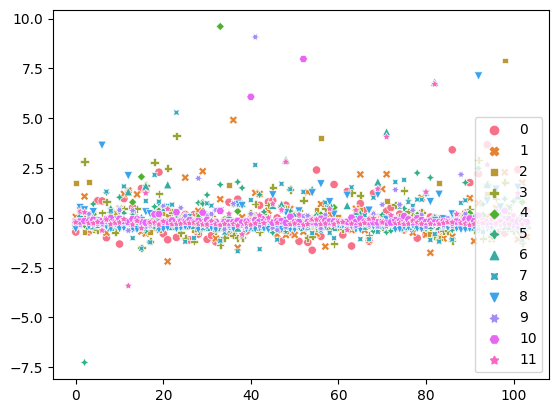

In [191]:
sns.scatterplot(data = X_scaled)

In [104]:
from sklearn.metrics import silhouette_score

In [192]:
k=range(2,11)
fits=[]
score=[]
dist = []
for i in k:
  kmeans=KMeans(n_clusters=i,n_init='auto').fit(X_scaled)
  fits.append(kmeans)
  score.append(silhouette_score(X_scaled,kmeans.labels_,metric='euclidean'))
  dist.append(kmeans.inertia_)

In [193]:
fits

[KMeans(n_clusters=2),
 KMeans(n_clusters=3),
 KMeans(n_clusters=4),
 KMeans(n_clusters=5),
 KMeans(n_clusters=6),
 KMeans(n_clusters=7),
 KMeans(),
 KMeans(n_clusters=9),
 KMeans(n_clusters=10)]

In [194]:
score #3,6,7,8

[0.5987447690041974,
 0.40137666178229536,
 0.48065954387153903,
 0.14915484034058538,
 0.3439343799783566,
 0.17952740656021593,
 0.1658336362116975,
 0.22423296400240977,
 0.21108985776521808]

In [39]:
dist = [1126.1621235925747,
 1035.327228283552,
 898.809842082525,
 813.3042688659607,
 752.979902477134,
 670.0956873962223,
 626.686008291195,
 540.9693026452923,
 530.9063828016715]

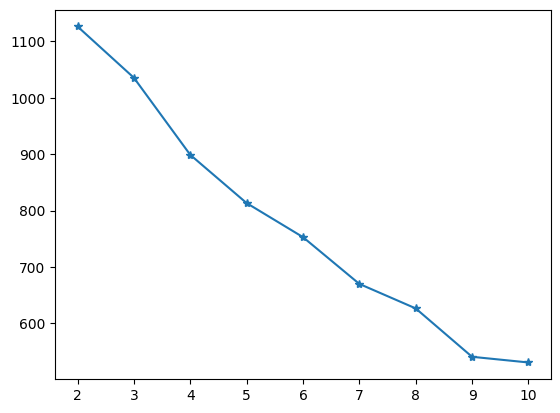

In [40]:
plt.plot(range(2,11),dist,marker="*")

In [216]:
optimal_clusters1 = 6

kmeans = KMeans(n_clusters=optimal_clusters1)
clusters = kmeans.fit_predict(X_scaled)

In [42]:
clusters = [4, 5, 1, 4, 5, 5, 0, 1, 5, 5, 5, 1, 3, 3, 5, 3, 0, 5, 1, 1, 5, 1,
       5, 1, 5, 3, 5, 5, 5, 3, 5, 5, 5, 3, 5, 4, 3, 3, 5, 5, 2, 1, 3, 5,
       5, 0, 5, 1, 0, 1, 5, 5, 2, 5, 5, 3, 4, 5, 5, 3, 5, 5, 3, 1, 5, 3,
       5, 5, 1, 0, 5, 0, 5, 1, 5, 1, 5, 5, 5, 1, 0, 5, 0, 4, 5, 5, 3, 5,
       1, 5, 3, 5, 0, 5, 0, 5, 5, 5, 4, 5, 5, 0, 3, 5]

In [43]:
data['clusters'] = clusters

In [44]:
unique_cluster = data['clusters'].unique()
print(unique_cluster)

[4 5 1 0 3 2]


In [52]:
def plot(x ,y, data):
    plt.figure(figsize=(10,5))
    sns.scatterplot(data=data, x=x, y=y,hue = "clusters", palette = "rainbow")
    plt.title('Clusters of Stocks')
    plt.show()
#cluster 3 - high ROE
#0 and 2 low ROE

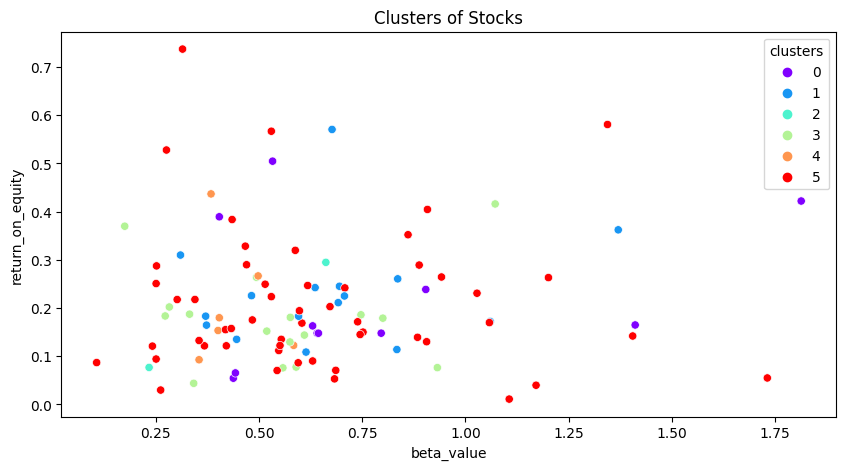

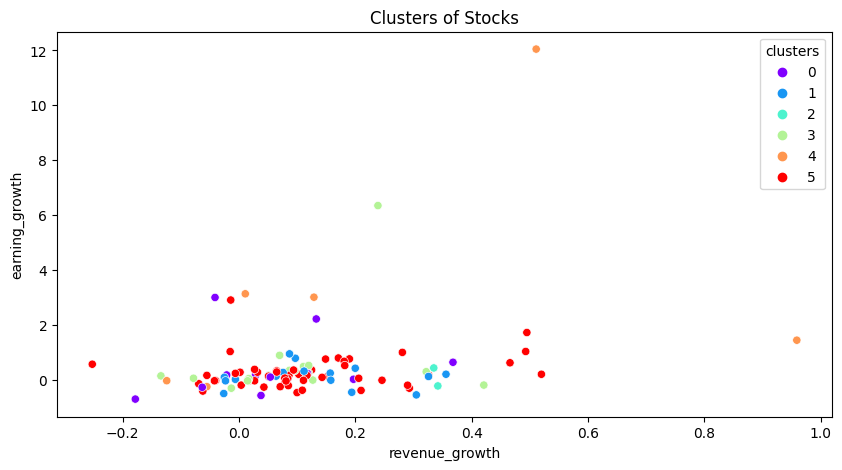

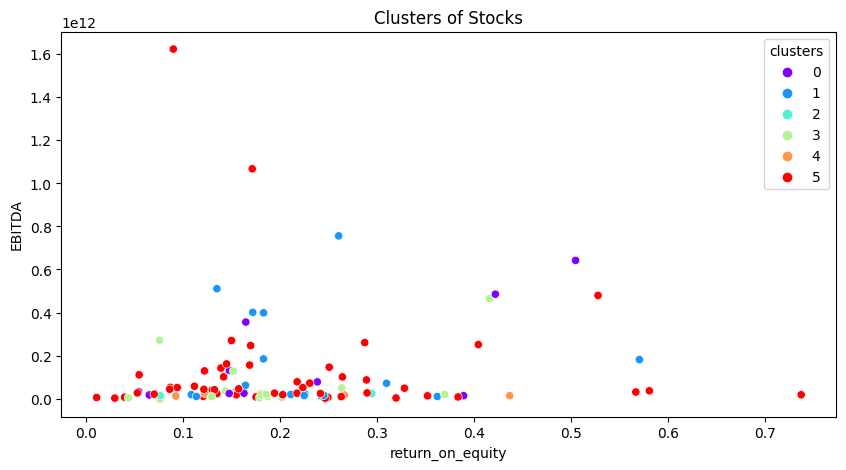

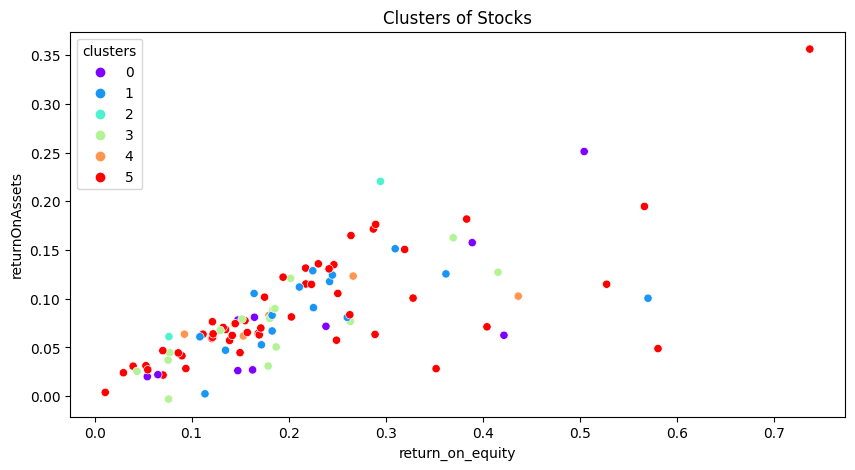

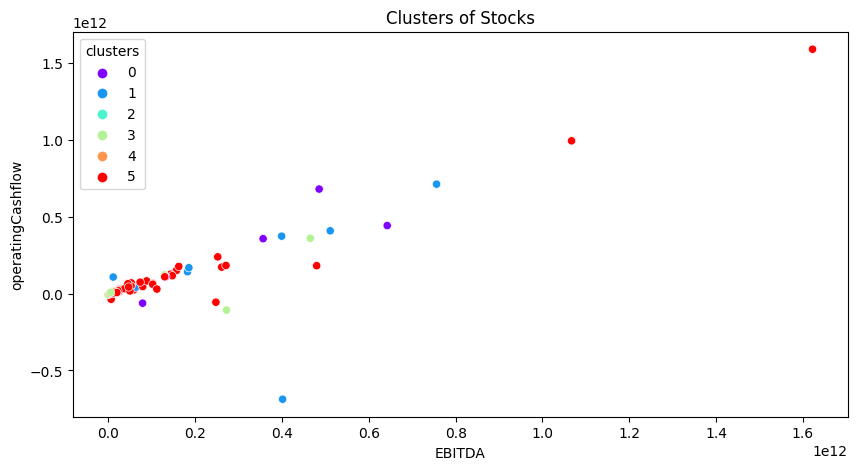

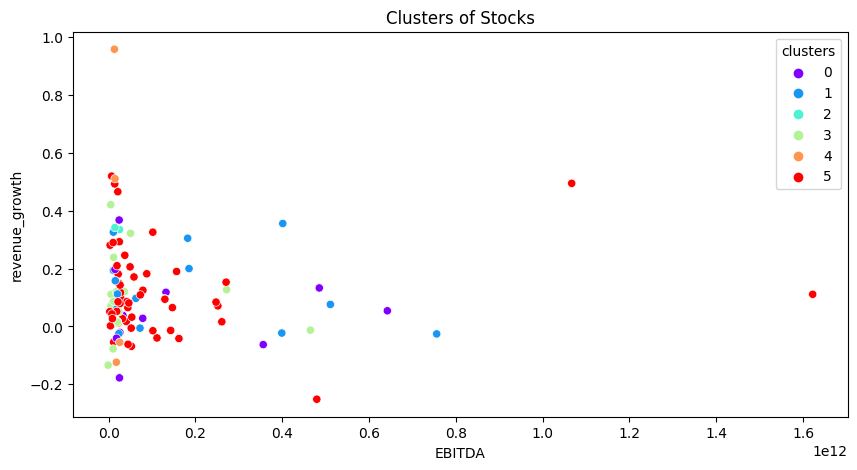

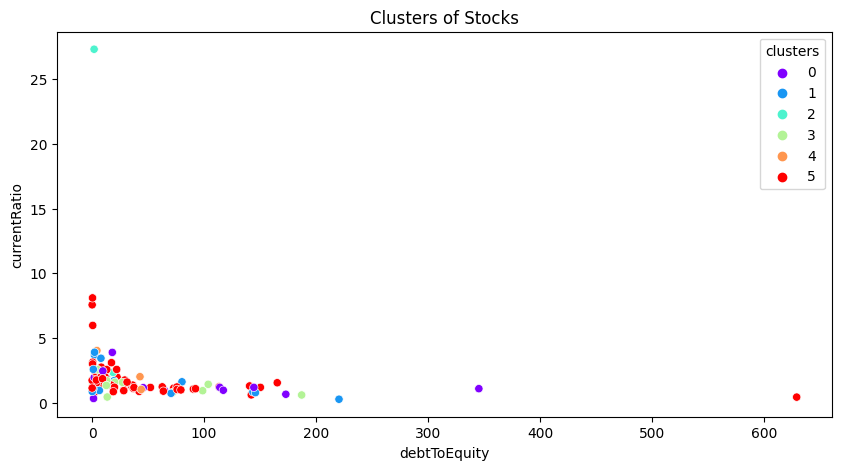

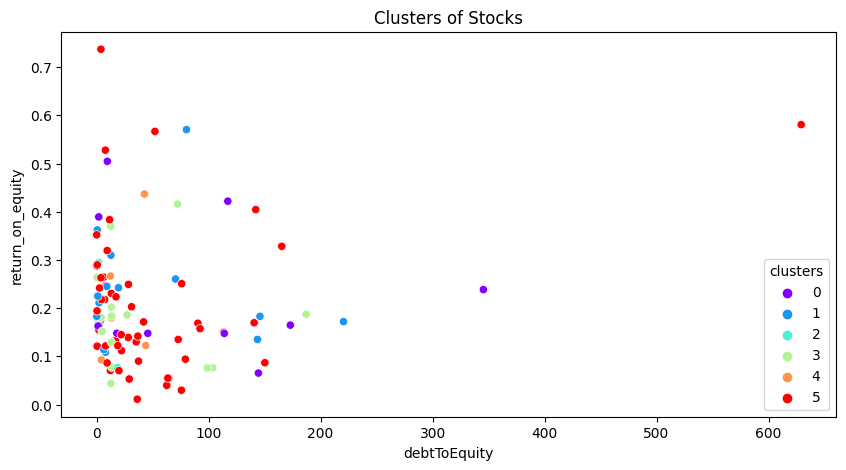

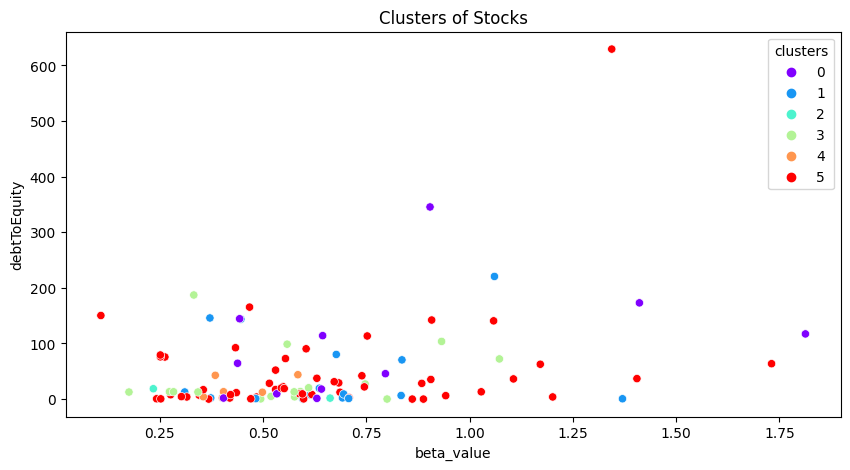

In [53]:
# 1. Risk and Volatility
plot('beta_value', 'return_on_equity', data)

# 2. Growth
plot('revenue_growth', 'earning_growth', data)

# 3. Profitability
plot('return_on_equity', 'EBITDA', data)
plot('return_on_equity', 'returnOnAssets', data)
plot('EBITDA', 'operatingCashflow', data)
plot('EBITDA', 'revenue_growth', data)

# 5. Financial Health
plot('debtToEquity', 'currentRatio', data)
plot('debtToEquity', 'return_on_equity', data)

#6. risk and stability
plot('beta_value','debtToEquity',data)


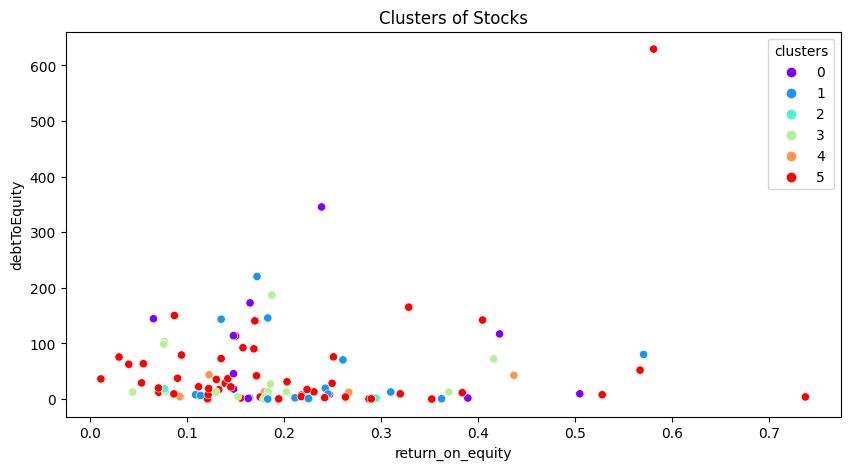

In [55]:
plot(y='debtToEquity',x= 'return_on_equity', data = data)


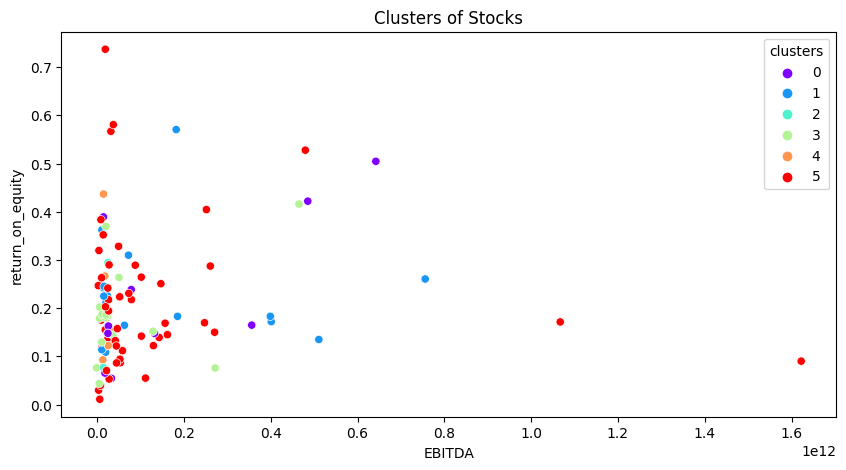

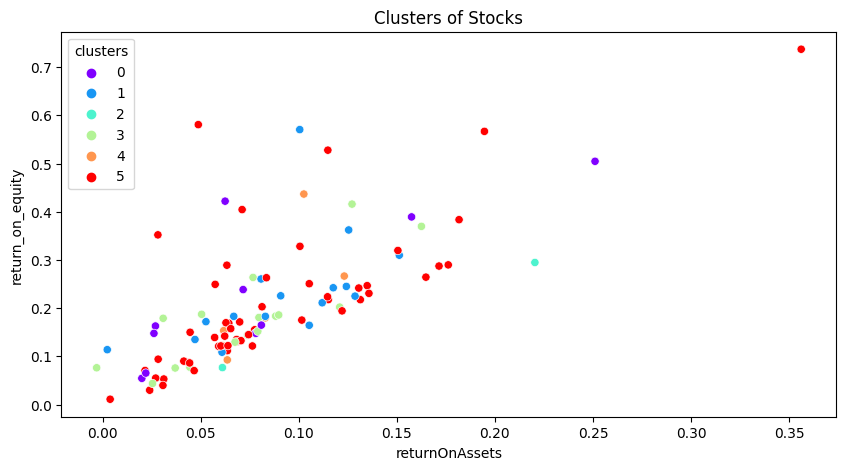

In [54]:
plot(y='return_on_equity', x='EBITDA', data = data)
plot(y='return_on_equity', x='returnOnAssets', data = data)

In [242]:
cluster0 = data[data['clusters']==0]  #purple
cluster0

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10,0
BPCL,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE029A01011,1.072,-0.013,-0.304,0.41591,4.831060,10.254208,4.649650e+11,0.12715,72.187,0.812,1.746934,3.593590e+11,0
HINDPETRO,Hindustan Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE094A01015,0.908,0.071,-0.249,0.40449,4.546239,6.268779,2.517663e+11,0.07112,142.118,0.611,1.552348,2.385187e+11,0
IOC,Indian Oil Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE242A01010,0.836,-0.026,-0.499,0.26050,5.512871,10.154407,7.559467e+11,0.08079,70.485,0.732,1.253781,7.109863e+11,0
NTPC,NTPC Ltd.,Power,EQ,INE733E01010,0.446,0.076,0.269,0.13498,18.451565,15.636400,5.109271e+11,0.04709,143.609,0.845,2.276211,4.078459e+11,0
ONGC,Oil & Natural Gas Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE213A01029,0.739,0.495,1.723,0.17139,7.848198,7.141860,1.067031e+12,0.06989,41.957,0.881,1.146786,9.926268e+11,0
POWERGRID,Power Grid Corporation of India Ltd.,Power,EQ,INE752E01010,0.371,-0.023,-0.035,0.18304,19.775215,16.130701,3.990289e+11,0.06686,145.829,0.786,3.661452,3.728950e+11,0
RELIANCE,Reliance Industries Ltd.,Oil Gas & Consumable Fuels,EQ,INE002A01018,0.630,0.111,-0.018,0.09007,31.082830,44.446068,1.622330e+12,0.04140,37.389,1.183,2.722968,1.587880e+12,0
TATACOMM,Tata Communications Ltd.,Telecommunication,EQ,INE151A01013,1.344,0.246,-0.015,0.58078,54.659023,167.070980,3.731690e+10,0.04878,629.181,0.439,29.666086,3.182000e+10,0


In [241]:
cluster1 = data[data['clusters']==1]   #blue
cluster1

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ADANIPOWER,Adani Power Ltd.,Power,EQ,INE814H01011,0.677,0.305,-0.548,0.57049,13.758721,-318.363220,1.821608e+11,0.10050,80.231,1.621,7.695268,1.417015e+11,1
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10,1
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10,1
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10,1
CGPOWER,CG Power and Industrial Solutions Ltd.,Capital Goods,EQ,INE067A01029,1.370,0.194,-0.453,0.36220,128.383400,79.502190,1.097380e+10,0.12545,0.582,1.642,36.781230,3.969900e+09,1
COALINDIA,Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014,0.276,-0.252,0.569,0.52782,8.173284,19.512386,4.797149e+11,0.11483,7.804,1.695,3.695842,1.810310e+11,1
COLPAL,Colgate Palmolive (India) Ltd.,Fast Moving Consumer Goods,EQ,INE259A01022,0.315,0.103,0.200,0.73726,62.303432,50.851208,1.884356e+10,0.35614,3.828,1.536,44.037495,1.198964e+10,1
HDFCAMC,HDFC Asset Management Company Ltd.,Financial Services,EQ,INE127D01025,0.662,0.335,0.433,0.29473,45.943910,41.203304,2.494210e+10,0.22038,1.766,27.319,12.579547,1.614690e+10,1
ITC,ITC Ltd.,Fast Moving Consumer Goods,EQ,INE154A01025,0.252,0.016,-0.013,0.28736,28.042149,23.772657,2.608542e+11,0.17150,0.406,3.000,7.691985,1.717886e+11,1


In [243]:
cluster2 = data[data['clusters']==2]   #sea blue
cluster2

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
HCLTECH,HCL Technologies Ltd.,Information Technology,EQ,INE860A01027,0.618,0.060,-0.002,0.23497,26.941805,22.513706,2.761000e+09,0.12952,8.453,2.610,516.10980,2.711000e+09,2
INFY,Infosys Ltd.,Information Technology,EQ,INE009A01021,0.588,0.002,0.276,0.31963,26.973684,24.149973,4.206000e+09,0.15054,9.448,2.305,671.01135,3.148000e+09,2


In [245]:
cluster4 = data[data['clusters']==4]
cluster4

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ACC,ACC Ltd.,Construction Materials,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.634583,19.626990,2.904540e+10,0.06174,2.173,1.595,3.089009,2.995110e+10,4
ALKEM,Alkem Laboratories Ltd.,Healthcare,EQ,INE540L01014,0.404,0.011,3.133,0.17980,34.598366,25.275915,2.245490e+10,0.08294,13.238,2.606,6.028354,1.948070e+10,4
GAIL,GAIL (India) Ltd.,Oil Gas & Consumable Fuels,EQ,INE129A01019,0.884,-0.014,2.906,0.13918,15.196678,12.601103,1.429632e+11,0.05712,28.232,0.937,1.955455,1.258572e+11,4
JUBLFOOD,Jubilant Foodworks Ltd.,Consumer Services,EQ,INE797F01020,0.332,0.239,6.346,0.18722,96.206604,19.974262,1.143479e+10,0.05048,187.112,0.603,17.722733,1.009641e+10,4
SJVN,SJVN Ltd.,Power,EQ,INE002L01015,0.443,-0.041,3.000,0.06527,64.397440,28.272045,1.817040e+10,0.02203,144.435,1.193,4.088282,1.309530e+10,4
TRENT,Trent Ltd.,Consumer Services,EQ,INE849A01020,0.384,0.511,12.045,0.43676,135.521580,90.579420,1.476680e+10,0.10259,42.729,2.017,49.387383,1.348980e+10,4


In [247]:
cluster5 = data[data['clusters']==5]
cluster5

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.523980,44.485340,1.566404e+11,0.06434,90.394,1.061,6.084853,1.501758e+11,5
APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024,0.554,0.149,0.756,0.13500,101.483790,77.866425,2.390700e+10,0.06830,72.845,1.132,13.173946,1.920200e+10,5
APOLLOTYRE,Apollo Tyres Ltd.,Automobile and Auto Components,EQ,INE438A01022,0.906,0.017,-0.039,0.13005,19.136848,24.942308,4.064255e+10,0.06835,35.283,1.282,2.370064,3.439524e+10,5
ASTRAL,Astral Ltd.,Capital Goods,EQ,INE006I01046,0.484,0.079,-0.117,0.17523,113.193220,66.273750,9.183000e+09,0.10155,3.653,1.771,19.400301,8.234000e+09,5
AUROPHARMA,Aurobindo Pharma Ltd.,Healthcare,EQ,INE406A01037,0.548,0.171,0.795,0.11178,24.494184,21.301170,5.843000e+10,0.06358,22.270,1.984,2.605043,2.434520e+10,5
DMART,Avenue Supermarts Ltd.,Consumer Services,EQ,INE192R01011,0.207,0.201,0.224,0.14582,127.742890,94.579110,4.103770e+10,0.10733,3.167,3.134,17.205118,2.745840e+10,5
BEL,Bharat Electronics Ltd.,Capital Goods,EQ,INE263A01024,0.494,0.322,0.296,0.26372,61.231617,44.472633,5.046410e+10,0.07670,0.382,1.546,14.913814,4.659490e+10,5
BIOCON,Biocon Ltd.,Healthcare,EQ,INE376G01013,0.438,0.038,-0.569,0.05434,41.071430,26.774809,3.298700e+10,0.02000,64.399,0.988,2.125938,2.953900e+10,5
CIPLA,Cipla Ltd.,Healthcare,EQ,INE059A01026,0.373,0.097,0.786,0.16445,29.619003,23.500935,6.291050e+10,0.10534,2.087,3.697,4.571110,4.133910e+10,5


In [285]:
#if the forward P/E ratio is lower than the trailing P/E ratio,
#it may mean that analysts are expecting earnings to increase. 
#If the forward P/E ratio is higher than the trailing P/E ratio, 
#it may mean that analysts expect a decline in earnings.

In [255]:
buy = data[data['forward_priceeq'] < data['trailing_priceeq']]  #buy
buy

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ACC,ACC Ltd.,Construction Materials,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.634583,19.626990,2.904540e+10,0.06174,2.173,1.595,3.089009,2.995110e+10,4
ADANIPOWER,Adani Power Ltd.,Power,EQ,INE814H01011,0.677,0.305,-0.548,0.57049,13.758721,-318.363220,1.821608e+11,0.10050,80.231,1.621,7.695268,1.417015e+11,1
ALKEM,Alkem Laboratories Ltd.,Healthcare,EQ,INE540L01014,0.404,0.011,3.133,0.17980,34.598366,25.275915,2.245490e+10,0.08294,13.238,2.606,6.028354,1.948070e+10,4
APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024,0.554,0.149,0.756,0.13500,101.483790,77.866425,2.390700e+10,0.06830,72.845,1.132,13.173946,1.920200e+10,5
ASTRAL,Astral Ltd.,Capital Goods,EQ,INE006I01046,0.484,0.079,-0.117,0.17523,113.193220,66.273750,9.183000e+09,0.10155,3.653,1.771,19.400301,8.234000e+09,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TRENT,Trent Ltd.,Consumer Services,EQ,INE849A01020,0.384,0.511,12.045,0.43676,135.521580,90.579420,1.476680e+10,0.10259,42.729,2.017,49.387383,1.348980e+10,4
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09,5
VEDL,Vedanta Ltd.,Metals & Mining,EQ,INE205A01025,1.411,-0.063,-0.271,0.16479,39.691086,9.681378,3.562700e+11,0.08093,172.980,0.660,5.429651,3.565400e+11,0


In [256]:
sell = data[data['forward_priceeq'] > data['trailing_priceeq']]  #sell
sell

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.523980,44.485340,1.566404e+11,0.06434,90.394,1.061,6.084853,1.501758e+11,5
APOLLOTYRE,Apollo Tyres Ltd.,Automobile and Auto Components,EQ,INE438A01022,0.906,0.017,-0.039,0.13005,19.136848,24.942308,4.064255e+10,0.06835,35.283,1.282,2.370064,3.439524e+10,5
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10,0
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10,1
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10,1
BAJAJFINSV,Bajaj Finserv Ltd.,Financial Services,EQ,INE918I01026,1.060,0.356,0.204,0.17197,31.535044,32.326450,4.012613e+11,0.05267,220.460,0.276,4.220583,-6.867420e+11,3
BPCL,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE029A01011,1.072,-0.013,-0.304,0.41591,4.831060,10.254208,4.649650e+11,0.12715,72.187,0.812,1.746934,3.593590e+11,0
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10,1
COALINDIA,Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014,0.276,-0.252,0.569,0.52782,8.173284,19.512386,4.797149e+11,0.11483,7.804,1.695,3.695842,1.810310e+11,1


In [264]:
#data = data.drop('clusters', axis=1)
features

,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow
Symbol,,,,,,,,,,,,
ACC,0.401,0.129,3.010,0.15334,21.634583,19.626990,2.904540e+10,0.06174,2.173,1.595,3.089009,2.995110e+10
ADANIPORTS,0.604,0.190,0.763,0.16872,37.523980,44.485340,1.566404e+11,0.06434,90.394,1.061,6.084853,1.501758e+11
ADANIPOWER,0.677,0.305,-0.548,0.57049,13.758721,-318.363220,1.821608e+11,0.10050,80.231,1.621,7.695268,1.417015e+11
ALKEM,0.404,0.011,3.133,0.17980,34.598366,25.275915,2.245490e+10,0.08294,13.238,2.606,6.028354,1.948070e+10
APOLLOHOSP,0.554,0.149,0.756,0.13500,101.483790,77.866425,2.390700e+10,0.06830,72.845,1.132,13.173946,1.920200e+10
...,...,...,...,...,...,...,...,...,...,...,...,...
TIINDIA,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09
ULTRACEMCO,0.551,0.094,0.356,0.12217,47.814960,84.663605,1.296856e+11,0.06389,18.916,0.861,5.552103,1.089754e+11
VEDL,1.411,-0.063,-0.271,0.16479,39.691086,9.681378,3.562700e+11,0.08093,172.980,0.660,5.429651,3.565400e+11


In [265]:
import scipy.cluster.hierarchy as sch

In [276]:
help(AgglomerativeClustering)

Help on class AgglomerativeClustering in module sklearn.cluster._agglomerative:

class AgglomerativeClustering(sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  AgglomerativeClustering(n_clusters=2, *, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='ward', distance_threshold=None, compute_distances=False)
 |  
 |  Agglomerative Clustering.
 |  
 |  Recursively merges pair of clusters of sample data; uses linkage distance.
 |  
 |  Read more in the :ref:`User Guide <hierarchical_clustering>`.
 |  
 |  Parameters
 |  ----------
 |  n_clusters : int or None, default=2
 |      The number of clusters to find. It must be ``None`` if
 |      ``distance_threshold`` is not ``None``.
 |  
 |  metric : str or callable, default="euclidean"
 |      Metric used to compute the linkage. Can be "euclidean", "l1", "l2",
 |      "manhattan", "cosine", or "precomputed". If linkage is "ward", only
 |      "euclidean" is accepted. If "precomputed", a distance 

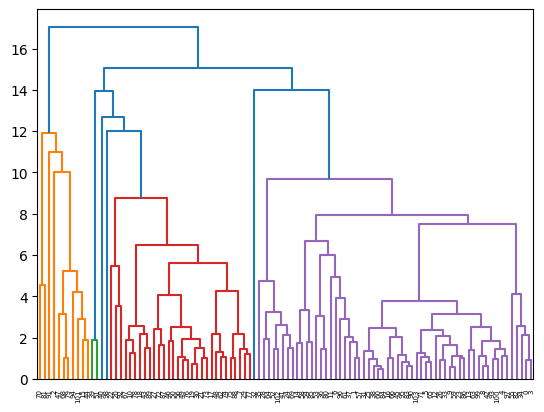

In [57]:
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))

In [58]:
print(dendrogram['color_list'])

['C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C1', 'C2', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C3', 'C0', 'C0', 'C0', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C4', 'C0', 'C0', 'C0']


In [59]:
unique_color = set(dendrogram['color_list'])
unique_color

{'C0', 'C1', 'C2', 'C3', 'C4'}

In [63]:
clus = len(unique_color) - 1

In [61]:
from sklearn.cluster import AgglomerativeClustering

In [64]:
# create clusters
hc = AgglomerativeClustering(n_clusters=clus, metric = 'euclidean', linkage = 'ward')
# save clusters for chart
y_hc = hc.fit_predict(X_scaled)

In [65]:
y_hc

array([2, 2, 1, 2, 2, 2, 2, 0, 2, 2, 0, 2, 2, 2, 2, 1, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 2, 2, 0, 2, 0, 0, 2, 3, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 2, 0, 1, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 0, 1, 2, 1, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 2, 2, 0,
       0, 0, 2, 1, 0, 2, 1, 2, 2, 2, 0, 2, 2, 1, 2, 2], dtype=int64)

In [285]:
data

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,Cluster
Symbol,,,,,,,,,,,,,,,,,
ACC,ACC Ltd.,Construction Materials,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.634583,19.626990,2.904540e+10,0.06174,2.173,1.595,3.089009,2.995110e+10,2
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.523980,44.485340,1.566404e+11,0.06434,90.394,1.061,6.084853,1.501758e+11,2
ADANIPOWER,Adani Power Ltd.,Power,EQ,INE814H01011,0.677,0.305,-0.548,0.57049,13.758721,-318.363220,1.821608e+11,0.10050,80.231,1.621,7.695268,1.417015e+11,1
ALKEM,Alkem Laboratories Ltd.,Healthcare,EQ,INE540L01014,0.404,0.011,3.133,0.17980,34.598366,25.275915,2.245490e+10,0.08294,13.238,2.606,6.028354,1.948070e+10,2
APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024,0.554,0.149,0.756,0.13500,101.483790,77.866425,2.390700e+10,0.06830,72.845,1.132,13.173946,1.920200e+10,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09,2
ULTRACEMCO,UltraTech Cement Ltd.,Construction Materials,EQ,INE481G01011,0.551,0.094,0.356,0.12217,47.814960,84.663605,1.296856e+11,0.06389,18.916,0.861,5.552103,1.089754e+11,2
VEDL,Vedanta Ltd.,Metals & Mining,EQ,INE205A01025,1.411,-0.063,-0.271,0.16479,39.691086,9.681378,3.562700e+11,0.08093,172.980,0.660,5.429651,3.565400e+11,1


In [66]:
data['Cluster'] = y_hc

In [68]:
numerical_columns = ['beta_value', 'revenue_growth', 'earning_growth', 'return_on_equity', 'trailing_priceeq',
                     'forward_priceeq', 'EBITDA', 'returnOnAssets', 'debtToEquity', 'currentRatio', 'priceToBook', 'operatingCashflow']

In [69]:
cluster_analysis = data.groupby('Cluster')[numerical_columns].agg(['mean', 'std'])
print(cluster_analysis)

        beta_value           revenue_growth           earning_growth  \
              mean       std           mean       std           mean   
Cluster                                                                
0         0.554382  0.277105       0.110382  0.139144       0.537794   
1         0.931545  0.441490       0.119273  0.169779       0.206364   
2         0.632345  0.290856       0.123845  0.190466       0.472362   
3         0.262000       NaN       0.281000       NaN       1.000000   

                  return_on_equity           trailing_priceeq             ...  \
              std             mean       std             mean        std  ...   
Cluster                                                                   ...   
0        2.056338         0.303611  0.126976        51.323551  31.997949  ...   
1        0.909212         0.308949  0.176557        19.172932  16.563883  ...   
2        1.142526         0.138286  0.065334        66.059333  62.665449  ...   
3        

In [289]:
# Interpret clusters
for cluster in cluster_analysis.index:
    print(f"Cluster {cluster}:")
    metrics = cluster_analysis.loc[cluster]
    high_growth = metrics['revenue_growth']['mean'] > data['revenue_growth'].mean()
    stable = metrics['beta_value']['mean'] < 1 and metrics['debtToEquity']['mean'] < data['debtToEquity'].mean()
    undervalued = metrics['trailing_priceeq']['mean'] < data['trailing_priceeq'].mean() 
    and metrics['priceToBook']['mean'] < data['priceToBook'].mean()
    
    if high_growth:
        print("  - High Growth Stocks")
    if stable:
        print("  - Stable Stocks")
    if undervalued:
        print("  - Undervalued Stocks")
    print("  - Characteristics:", metrics)
    print()


Cluster 0:
  - Stable Stocks
  - Characteristics: beta_value         mean    5.447941e-01
                   std     2.834346e-01
revenue_growth     mean    1.149706e-01
                   std     1.395057e-01
earning_growth     mean    5.374412e-01
                   std     2.056598e+00
return_on_equity   mean    2.927118e-01
                   std     1.247963e-01
trailing_priceeq   mean    5.387204e+01
                   std     3.435377e+01
forward_priceeq    mean    5.216414e+01
                   std     3.630914e+01
EBITDA             mean    5.472959e+10
                   std     9.039117e+10
returnOnAssets     mean    1.372694e-01
                   std     5.136668e-02
debtToEquity       mean    1.060735e+01
                   std     1.612778e+01
currentRatio       mean    3.354824e+00
                   std     4.534655e+00
priceToBook        mean    4.915323e+01
                   std     1.399568e+02
operatingCashflow  mean    3.557782e+10
                   std     4.4

In [73]:
# Interpret clusters
for cluster in cluster_analysis.index:
    print(f"Cluster {cluster}:")
    metrics = cluster_analysis.loc[cluster]
    high_growth = metrics['revenue_growth']['mean'] > data['revenue_growth'].mean()
    stable = metrics['beta_value']['mean'] < 1 and metrics['debtToEquity']['mean'] < data['debtToEquity'].mean()
    undervalued = metrics['trailing_priceeq']['mean'] < data['trailing_priceeq'].mean() and metrics['priceToBook']['mean'] < data['priceToBook'].mean()
    
    if high_growth:
        print("  - High Growth Stocks")
    elif stable:
        print("  - Stable Stocks")
    elif undervalued:
        print("  - Undervalued Stocks")
    #print("  - Characteristics:", metrics)
    print()


Cluster 0:
  - Stable Stocks

Cluster 1:
  - Undervalued Stocks

Cluster 2:
  - High Growth Stocks

Cluster 3:
  - High Growth Stocks



In [293]:
c0_stable = data[data['Cluster']==0]
c0_stable

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,Cluster
Symbol,,,,,,,,,,,,,,,,,
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10,0
DMART,Avenue Supermarts Ltd.,Consumer Services,EQ,INE192R01011,0.207,0.201,0.224,0.14582,127.742890,94.579110,4.103770e+10,0.10733,3.167,3.134,17.205118,2.745840e+10,0
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10,0
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10,0
CGPOWER,CG Power and Industrial Solutions Ltd.,Capital Goods,EQ,INE067A01029,1.370,0.194,-0.453,0.36220,128.383400,79.502190,1.097380e+10,0.12545,0.582,1.642,36.781230,3.969900e+09,0
CIPLA,Cipla Ltd.,Healthcare,EQ,INE059A01026,0.373,0.097,0.786,0.16445,29.619003,23.500935,6.291050e+10,0.10534,2.087,3.697,4.571110,4.133910e+10,0
COALINDIA,Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014,0.276,-0.252,0.569,0.52782,8.173284,19.512386,4.797149e+11,0.11483,7.804,1.695,3.695842,1.810310e+11,0
COFORGE,Coforge Ltd.,Information Technology,EQ,INE591G01017,0.636,0.087,0.946,0.24232,46.113167,30.117140,1.427700e+10,0.11758,19.480,1.699,10.182817,9.034000e+09,0
COLPAL,Colgate Palmolive (India) Ltd.,Fast Moving Consumer Goods,EQ,INE259A01022,0.315,0.103,0.200,0.73726,62.303432,50.851208,1.884356e+10,0.35614,3.828,1.536,44.037495,1.198964e+10,0


In [294]:
c2_high = data[data['Cluster']==2]
c2_high

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,Cluster
Symbol,,,,,,,,,,,,,,,,,
ACC,ACC Ltd.,Construction Materials,EQ,INE012A01025,0.401,0.129,3.010,0.15334,21.634583,19.626990,2.904540e+10,0.06174,2.173,1.595,3.089009,2.995110e+10,2
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.523980,44.485340,1.566404e+11,0.06434,90.394,1.061,6.084853,1.501758e+11,2
ALKEM,Alkem Laboratories Ltd.,Healthcare,EQ,INE540L01014,0.404,0.011,3.133,0.17980,34.598366,25.275915,2.245490e+10,0.08294,13.238,2.606,6.028354,1.948070e+10,2
APOLLOHOSP,Apollo Hospitals Enterprise Ltd.,Healthcare,EQ,INE437A01024,0.554,0.149,0.756,0.13500,101.483790,77.866425,2.390700e+10,0.06830,72.845,1.132,13.173946,1.920200e+10,2
APOLLOTYRE,Apollo Tyres Ltd.,Automobile and Auto Components,EQ,INE438A01022,0.906,0.017,-0.039,0.13005,19.136848,24.942308,4.064255e+10,0.06835,35.283,1.282,2.370064,3.439524e+10,2
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10,2
ASTRAL,Astral Ltd.,Capital Goods,EQ,INE006I01046,0.484,0.079,-0.117,0.17523,113.193220,66.273750,9.183000e+09,0.10155,3.653,1.771,19.400301,8.234000e+09,2
AUROPHARMA,Aurobindo Pharma Ltd.,Healthcare,EQ,INE406A01037,0.548,0.171,0.795,0.11178,24.494184,21.301170,5.843000e+10,0.06358,22.270,1.984,2.605043,2.434520e+10,2
BAJAJFINSV,Bajaj Finserv Ltd.,Financial Services,EQ,INE918I01026,1.060,0.356,0.204,0.17197,31.535044,32.326450,4.012613e+11,0.05267,220.460,0.276,4.220583,-6.867420e+11,2


In [314]:
c3_high = data[data['Cluster']==3]
c3_high

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,Cluster
Symbol,,,,,,,,,,,,,,,,,
NYKAA,FSN E-Commerce Ventures Ltd.,Consumer Services,EQ,INE388Y01029,0.262,0.281,1.0,0.02974,1639.0,126.07692,3.461500e+09,0.024,75.679,1.22,49.503017,2510000.0,3


In [326]:
final_clustering = pd.concat([c0_stable, c2_high, c3_high])
final_clustering

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,Cluster
Symbol,,,,,,,,,,,,,,,,,
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10,0
DMART,Avenue Supermarts Ltd.,Consumer Services,EQ,INE192R01011,0.207,0.201,0.224,0.14582,127.742890,94.579110,4.103770e+10,0.10733,3.167,3.134,17.205118,2.745840e+10,0
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10,0
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10,0
CGPOWER,CG Power and Industrial Solutions Ltd.,Capital Goods,EQ,INE067A01029,1.370,0.194,-0.453,0.36220,128.383400,79.502190,1.097380e+10,0.12545,0.582,1.642,36.781230,3.969900e+09,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09,2
ULTRACEMCO,UltraTech Cement Ltd.,Construction Materials,EQ,INE481G01011,0.551,0.094,0.356,0.12217,47.814960,84.663605,1.296856e+11,0.06389,18.916,0.861,5.552103,1.089754e+11,2
VOLTAS,Voltas Ltd.,Consumer Durables,EQ,INE226A01021,0.342,0.421,-0.191,0.04373,201.058200,49.127342,4.874000e+09,0.02545,12.702,1.342,8.640929,7.615100e+09,2


In [324]:
kmeanclust = pd.concat([cluster0, cluster1, cluster2, cluster4, cluster5])
kmeanclust

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow,clusters
Symbol,,,,,,,,,,,,,,,,,
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10,0
BPCL,Bharat Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE029A01011,1.072,-0.013,-0.304,0.41591,4.831060,10.254208,4.649650e+11,0.12715,72.187,0.812,1.746934,3.593590e+11,0
HINDPETRO,Hindustan Petroleum Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE094A01015,0.908,0.071,-0.249,0.40449,4.546239,6.268779,2.517663e+11,0.07112,142.118,0.611,1.552348,2.385187e+11,0
IOC,Indian Oil Corporation Ltd.,Oil Gas & Consumable Fuels,EQ,INE242A01010,0.836,-0.026,-0.499,0.26050,5.512871,10.154407,7.559467e+11,0.08079,70.485,0.732,1.253781,7.109863e+11,0
NTPC,NTPC Ltd.,Power,EQ,INE733E01010,0.446,0.076,0.269,0.13498,18.451565,15.636400,5.109271e+11,0.04709,143.609,0.845,2.276211,4.078459e+11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TITAN,Titan Company Ltd.,Consumer Durables,EQ,INE280A01028,0.467,0.206,0.057,0.32831,82.163574,54.274075,4.945000e+10,0.10060,165.315,1.549,30.527018,1.695000e+10,5
TORNTPOWER,Torrent Power Ltd.,Power,EQ,INE813H01021,0.433,0.081,-0.042,0.15745,39.633860,49.886030,4.661160e+10,0.06532,92.334,1.089,6.017023,4.258350e+10,5
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09,5


In [363]:
kmeanclust = kmeanclust.drop('clusters',axis=1)

In [361]:
final_clustering = final_clustering.drop('Cluster',axis=1)

In [380]:
final_clustering

,Company Name,Industry,Series,ISIN Code,beta_value,revenue_growth,earning_growth,return_on_equity,trailing_priceeq,forward_priceeq,EBITDA,returnOnAssets,debtToEquity,currentRatio,priceToBook,operatingCashflow
Symbol,,,,,,,,,,,,,,,,
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10
DMART,Avenue Supermarts Ltd.,Consumer Services,EQ,INE192R01011,0.207,0.201,0.224,0.14582,127.742890,94.579110,4.103770e+10,0.10733,3.167,3.134,17.205118,2.745840e+10
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10
CGPOWER,CG Power and Industrial Solutions Ltd.,Capital Goods,EQ,INE067A01029,1.370,0.194,-0.453,0.36220,128.383400,79.502190,1.097380e+10,0.12545,0.582,1.642,36.781230,3.969900e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09
ULTRACEMCO,UltraTech Cement Ltd.,Construction Materials,EQ,INE481G01011,0.551,0.094,0.356,0.12217,47.814960,84.663605,1.296856e+11,0.06389,18.916,0.861,5.552103,1.089754e+11
VOLTAS,Voltas Ltd.,Consumer Durables,EQ,INE226A01021,0.342,0.421,-0.191,0.04373,201.058200,49.127342,4.874000e+09,0.02545,12.702,1.342,8.640929,7.615100e+09


In [364]:
common=[]

In [367]:
common = pd.merge(kmeanclust, final_clustering, on='Symbol')
common

,Company Name_x,Industry_x,Series_x,ISIN Code_x,beta_value_x,revenue_growth_x,earning_growth_x,return_on_equity_x,trailing_priceeq_x,forward_priceeq_x,...,earning_growth_y,return_on_equity_y,trailing_priceeq_y,forward_priceeq_y,EBITDA_y,returnOnAssets_y,debtToEquity_y,currentRatio_y,priceToBook_y,operatingCashflow_y
Symbol,,,,,,,,,,,,,,,,,,,,,
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,...,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,...,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,...,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,...,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10
CGPOWER,CG Power and Industrial Solutions Ltd.,Capital Goods,EQ,INE067A01029,1.370,0.194,-0.453,0.36220,128.383400,79.502190,...,-0.453,0.36220,128.383400,79.502190,1.097380e+10,0.12545,0.582,1.642,36.781230,3.969900e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TITAN,Titan Company Ltd.,Consumer Durables,EQ,INE280A01028,0.467,0.206,0.057,0.32831,82.163574,54.274075,...,0.057,0.32831,82.163574,54.274075,4.945000e+10,0.10060,165.315,1.549,30.527018,1.695000e+10
TORNTPOWER,Torrent Power Ltd.,Power,EQ,INE813H01021,0.433,0.081,-0.042,0.15745,39.633860,49.886030,...,-0.042,0.15745,39.633860,49.886030,4.661160e+10,0.06532,92.334,1.089,6.017023,4.258350e+10
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,...,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09


In [390]:
rye = common.index.tolist()
rye

['ASHOKLEY',
 'ASIANPAINT',
 'BAJAJ-AUTO',
 'BRITANNIA',
 'CGPOWER',
 'COALINDIA',
 'COLPAL',
 'HDFCAMC',
 'ITC',
 'IRCTC',
 'MARICO',
 'NMDC',
 'OFSS',
 'PAGEIND',
 'POLYCAB',
 'SUNTV',
 'HCLTECH',
 'INFY',
 'ACC',
 'ALKEM',
 'GAIL',
 'JUBLFOOD',
 'SJVN',
 'TRENT',
 'ADANIPORTS',
 'APOLLOHOSP',
 'APOLLOTYRE',
 'ASTRAL',
 'AUROPHARMA',
 'DMART',
 'BEL',
 'BIOCON',
 'CIPLA',
 'COFORGE',
 'CONCOR',
 'DABUR',
 'DALBHARAT',
 'DIVISLAB',
 'LALPATHLAB',
 'DRREDDY',
 'ESCORTS',
 'FORTIS',
 'GRASIM',
 'GUJGASLTD',
 'HAVELLS',
 'HAL',
 'ICICIGI',
 'IGL',
 'INDUSTOWER',
 'IPCALAB',
 'JSWENERGY',
 'LTTS',
 'LT',
 'LUPIN',
 'MRF',
 'MARUTI',
 'MPHASIS',
 'NHPC',
 'OBEROIRLTY',
 'OIL',
 'PIIND',
 'PERSISTENT',
 'PETRONET',
 'PIDILITIND',
 'PRESTIGE',
 'SRF',
 'SHREECEM',
 'SUNPHARMA',
 'SUPREMEIND',
 'SYNGENE',
 'TATACONSUM',
 'TECHM',
 'TITAN',
 'TORNTPOWER',
 'TIINDIA',
 'ULTRACEMCO',
 'WIPRO']

In [372]:
print(common.columns)

# Select columns correctly based on exact names
columns_to_keep = ['Company Name_x', 'Industry_x', 'Series_x', 'ISIN Code_x', 'beta_value_x',
                   'revenue_growth_x', 'earning_growth_x', 'return_on_equity_x',
                   'trailing_priceeq_x', 'forward_priceeq_x', 'EBITDA_x', 'returnOnAssets_x',
                   'debtToEquity_x', 'currentRatio_x', 'priceToBook_x', 'operatingCashflow_x']

common = common[columns_to_keep]

Index(['Company Name_x', 'Industry_x', 'Series_x', 'ISIN Code_x',
       'beta_value_x', 'revenue_growth_x', 'earning_growth_x',
       'return_on_equity_x', 'trailing_priceeq_x', 'forward_priceeq_x',
       'EBITDA_x', 'returnOnAssets_x', 'debtToEquity_x', 'currentRatio_x',
       'priceToBook_x', 'operatingCashflow_x', 'Company Name_y', 'Industry_y',
       'Series_y', 'ISIN Code_y', 'beta_value_y', 'revenue_growth_y',
       'earning_growth_y', 'return_on_equity_y', 'trailing_priceeq_y',
       'forward_priceeq_y', 'EBITDA_y', 'returnOnAssets_y', 'debtToEquity_y',
       'currentRatio_y', 'priceToBook_y', 'operatingCashflow_y'],
      dtype='object')


In [373]:
common

,Company Name_x,Industry_x,Series_x,ISIN Code_x,beta_value_x,revenue_growth_x,earning_growth_x,return_on_equity_x,trailing_priceeq_x,forward_priceeq_x,EBITDA_x,returnOnAssets_x,debtToEquity_x,currentRatio_x,priceToBook_x,operatingCashflow_x
Symbol,,,,,,,,,,,,,,,,
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10
CGPOWER,CG Power and Industrial Solutions Ltd.,Capital Goods,EQ,INE067A01029,1.370,0.194,-0.453,0.36220,128.383400,79.502190,1.097380e+10,0.12545,0.582,1.642,36.781230,3.969900e+09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TITAN,Titan Company Ltd.,Consumer Durables,EQ,INE280A01028,0.467,0.206,0.057,0.32831,82.163574,54.274075,4.945000e+10,0.10060,165.315,1.549,30.527018,1.695000e+10
TORNTPOWER,Torrent Power Ltd.,Power,EQ,INE813H01021,0.433,0.081,-0.042,0.15745,39.633860,49.886030,4.661160e+10,0.06532,92.334,1.089,6.017023,4.258350e+10
TIINDIA,Tube Investments of India Ltd.,Automobile and Auto Components,EQ,INE974X01010,0.672,0.210,-0.385,0.20288,90.514280,69.113150,1.926240e+10,0.08128,31.194,1.601,15.752627,6.751500e+09


In [374]:
new_common = common[common['forward_priceeq_x'] > common['trailing_priceeq_x']]

In [375]:
new_common

,Company Name_x,Industry_x,Series_x,ISIN Code_x,beta_value_x,revenue_growth_x,earning_growth_x,return_on_equity_x,trailing_priceeq_x,forward_priceeq_x,EBITDA_x,returnOnAssets_x,debtToEquity_x,currentRatio_x,priceToBook_x,operatingCashflow_x
Symbol,,,,,,,,,,,,,,,,
ASHOKLEY,Ashok Leyland Ltd.,Capital Goods,EQ,INE208A01029,0.904,0.028,0.140,0.23850,26.571090,28.936773,7.864180e+10,0.07164,345.368,1.092,7.312985,-6.257980e+10
ASIANPAINT,Asian Paints Ltd.,Consumer Durables,EQ,INE021A01026,0.310,-0.006,0.018,0.30988,52.792640,106.202194,7.228570e+10,0.15125,12.739,2.063,15.360563,6.103600e+10
BAJAJ-AUTO,Bajaj Auto Ltd.,Automobile and Auto Components,EQ,INE917I01010,0.942,0.326,0.181,0.26432,34.590485,55.079723,1.018518e+11,0.16482,6.166,1.298,9.090659,6.558160e+10
BRITANNIA,Britannia Industries Ltd.,Fast Moving Consumer Goods,EQ,INE216A01030,0.530,0.027,-0.036,0.56682,65.228240,71.120186,3.169840e+10,0.19465,52.066,1.187,35.361060,2.572980e+10
COALINDIA,Coal India Ltd.,Oil Gas & Consumable Fuels,EQ,INE522F01014,0.276,-0.252,0.569,0.52782,8.173284,19.512386,4.797149e+11,0.11483,7.804,1.695,3.695842,1.810310e+11
ADANIPORTS,Adani Ports and Special Economic Zone Ltd.,Services,EQ,INE742F01042,0.604,0.190,0.763,0.16872,37.523980,44.485340,1.566404e+11,0.06434,90.394,1.061,6.084853,1.501758e+11
APOLLOTYRE,Apollo Tyres Ltd.,Automobile and Auto Components,EQ,INE438A01022,0.906,0.017,-0.039,0.13005,19.136848,24.942308,4.064255e+10,0.06835,35.283,1.282,2.370064,3.439524e+10
DIVISLAB,Divi's Laboratories Ltd.,Healthcare,EQ,INE361B01024,0.368,0.181,0.675,0.12150,75.042150,80.627000,2.205000e+10,0.07636,0.022,7.570,8.886579,1.261000e+10
LALPATHLAB,Dr. Lal Path Labs Ltd.,Healthcare,EQ,INE600L01024,0.283,0.111,0.485,0.20212,68.592514,100.437380,5.672610e+09,0.12087,13.097,2.422,13.278062,5.353340e+09


In [379]:
new_symbol = new_common.index.tolist()
new_symbol

['ASHOKLEY',
 'ASIANPAINT',
 'BAJAJ-AUTO',
 'BRITANNIA',
 'COALINDIA',
 'ADANIPORTS',
 'APOLLOTYRE',
 'DIVISLAB',
 'LALPATHLAB',
 'GRASIM',
 'INDUSTOWER',
 'JSWENERGY',
 'OBEROIRLTY',
 'PERSISTENT',
 'PETRONET',
 'PIDILITIND',
 'PRESTIGE',
 'SUNPHARMA',
 'SUPREMEIND',
 'TORNTPOWER',
 'ULTRACEMCO']

In [386]:
symbols_not_in_common = data.index.difference(common.index)

# Create a new DataFrame with details of symbols not in common
new_common2 = data.loc[symbols_not_in_common].index

# Display the new DataFrame
new_common2

Index(['ADANIPOWER', 'BAJAJFINSV', 'BDL', 'BHEL', 'BPCL', 'DIXON', 'DLF',
       'GLAND', 'GODREJPROP', 'HDFCLIFE', 'HINDPETRO', 'IOC', 'JINDALSTEL',
       'LAURUSLABS', 'M&M', 'MAZDOCK', 'NTPC', 'NYKAA', 'ONGC', 'POWERGRID',
       'RELIANCE', 'SAIL', 'SUZLON', 'TATACOMM', 'TATAMTRDVR', 'VEDL',
       'VOLTAS'],
      dtype='object', name='Symbol')